The goal of the project is to predict salaries in data sience industry based on different factors like expierence, employee residence, job title, etc.

I order to do that we will use data_science_salaries dataset avaible at Kaggle under link: https://www.kaggle.com/datasets/sazidthe1/data-science-salaries

First step is to import required libraries.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from matplotlib.ticker import FuncFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.pipeline import make_pipeline
from sklearn.metrics import silhouette_score
from sklearn.svm import SVR

We are connecting dataset with our code editor.

In [3]:
dataset = pd.read_csv('C:\\Users\\piotr\\Downloads\\data_science_salaries.csv')

Know we should check how our dataset look a like? (does it contains missing values/what type of data it has?)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           6599 non-null   object
 1   experience_level    6599 non-null   object
 2   employment_type     6599 non-null   object
 3   work_models         6599 non-null   object
 4   work_year           6599 non-null   int64 
 5   employee_residence  6599 non-null   object
 6   salary              6599 non-null   int64 
 7   salary_currency     6599 non-null   object
 8   salary_in_usd       6599 non-null   int64 
 9   company_location    6599 non-null   object
 10  company_size        6599 non-null   object
dtypes: int64(3), object(8)
memory usage: 567.2+ KB


We would like to see how our data look alike (some visualisations of variables distrubutions)


Starting from salary

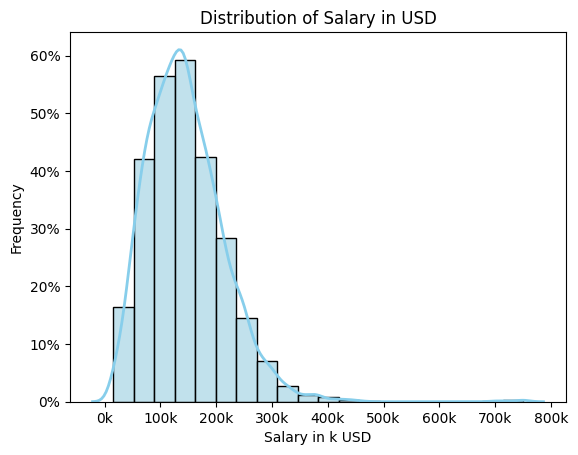

In [5]:
# Define a function to format salary values in thousands
def format_thousands(x, _):
    return f'{int(x / 1000)}k'

# Plot a bar chart of the 'salary_in_usd' column
sns.histplot(dataset['salary_in_usd'], bins=20, kde=False, color='lightblue', element='bars', stat='density')

# Overlay a kernel density plot
sns.kdeplot(dataset['salary_in_usd'], color='skyblue', label='Kernel Density', linewidth=2)

# Set the x-axis formatter to display values in thousands
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_thousands))

# Convert y-axis labels to percentage
def to_percentage(y, _):
    return f'{y * 10000000:.0f}%'

plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percentage))


plt.xlabel('Salary in k USD')
plt.ylabel('Frequency')
plt.title('Distribution of Salary in USD')

plt.show()

In [6]:
# Create a new DataFrame for salary ranges
salary_ranges = pd.DataFrame(columns=['job_title', 'min_salary', 'max_salary', 'Range'])

# Iterate through each job title
for job_title in dataset['job_title'].unique():
    # Filter data for the specific job title
    subset = dataset[dataset['job_title'] == job_title]
    
    # Calculate minimum and maximum salaries
    min_salary = subset['salary_in_usd'].min()
    max_salary = subset['salary_in_usd'].max()
    
    # Create the Range string
    salary_range_str = f"<{min_salary} - {max_salary}>"
    
    # Append the results to the salary_ranges DataFrame
    salary_ranges = pd.concat([salary_ranges, pd.DataFrame({
        'job_title': [job_title],
        'min_salary': [min_salary],
        'max_salary': [max_salary],
        'Range': [salary_range_str]
    })], ignore_index=True)

# Display the resulting table
print(salary_ranges)

                           job_title min_salary max_salary              Range
0                      Data Engineer      17025     750000   <17025 - 750000>
1                     Data Scientist      16000     750000   <16000 - 750000>
2                       BI Developer      49216     197000   <49216 - 197000>
3                   Research Analyst      43064     250000   <43064 - 250000>
4    Business Intelligence Developer      15000     177500   <15000 - 177500>
..                               ...        ...        ...                ...
127  Staff Machine Learning Engineer     185000     185000  <185000 - 185000>
128             Cloud Data Architect     250000     250000  <250000 - 250000>
129             Staff Data Scientist     105000     164000  <105000 - 164000>
130          Marketing Data Engineer      66970      66970    <66970 - 66970>
131               Sales Data Analyst      60000      60000    <60000 - 60000>

[132 rows x 4 columns]


Now Expierence level

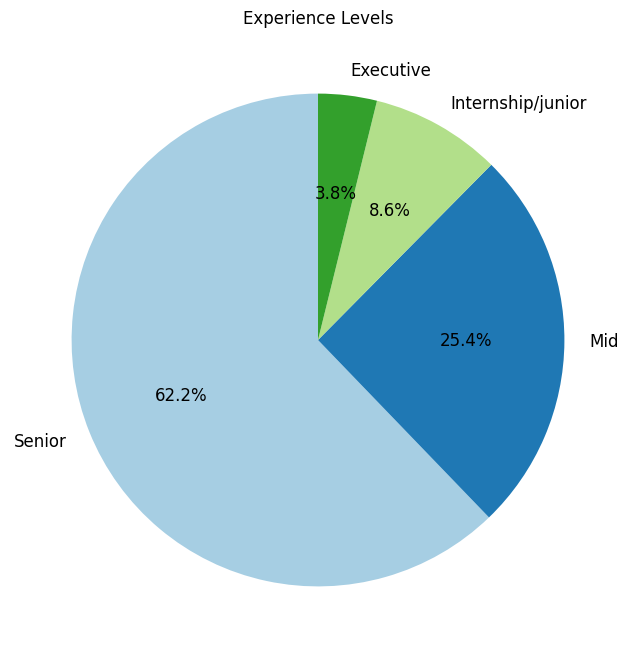

In [7]:
# Provided experience level mapping
experience_level_mapping = {
    'Entry-level': 'Internship/junior',
    'Mid-level': 'Mid',
    'Senior-level': 'Senior',
    'Executive-level': 'Executive'
}

# Map the experience levels
dataset['experience_level_mapped'] = dataset['experience_level'].map(experience_level_mapping)

# Count the occurrences of each mapped experience level
experience_counts = dataset['experience_level_mapped'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(experience_counts, labels=experience_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors,  textprops={'fontsize': 12, 'color': 'black'})
plt.title('Experience Levels')
plt.show()



Job title

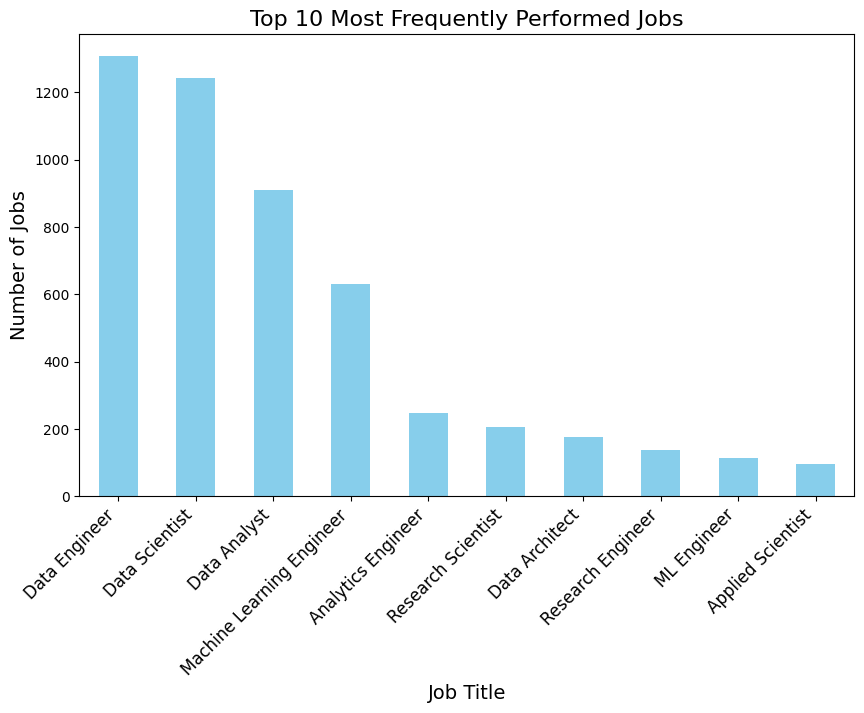

In [8]:
# Count the occurrences of each job title
job_title_counts = dataset['job_title'].value_counts()

# Limit to top 10 job titles
top_10_job_titles = job_title_counts.head(10)

# Create a bar chart for the top 10 job titles
plt.figure(figsize=(10, 6))
top_10_job_titles.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequently Performed Jobs', fontsize=16)
plt.xlabel('Job Title', fontsize=14)
plt.ylabel('Number of Jobs', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.show()

Work Models

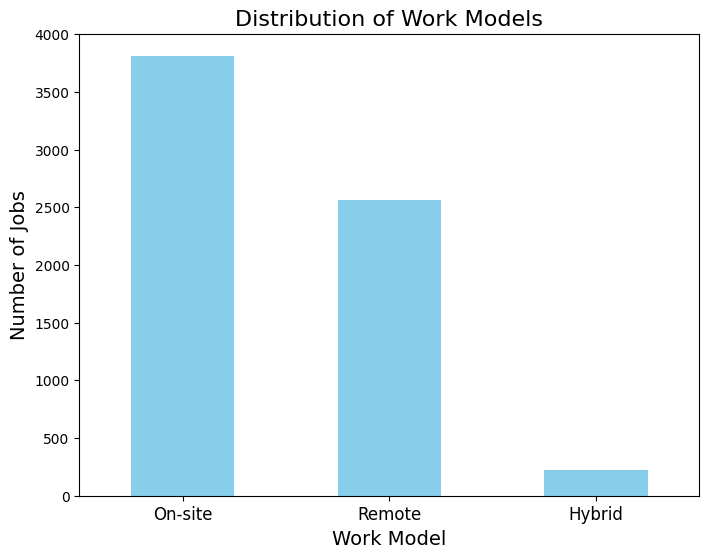

In [9]:
# Count the occurrences of each work model
work_models_counts = dataset['work_models'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
work_models_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Work Models', fontsize=16)
plt.xlabel('Work Model', fontsize=14)
plt.ylabel('Number of Jobs', fontsize=14)
plt.xticks(rotation=0, ha='center', fontsize=12)
plt.show()

Employment Type

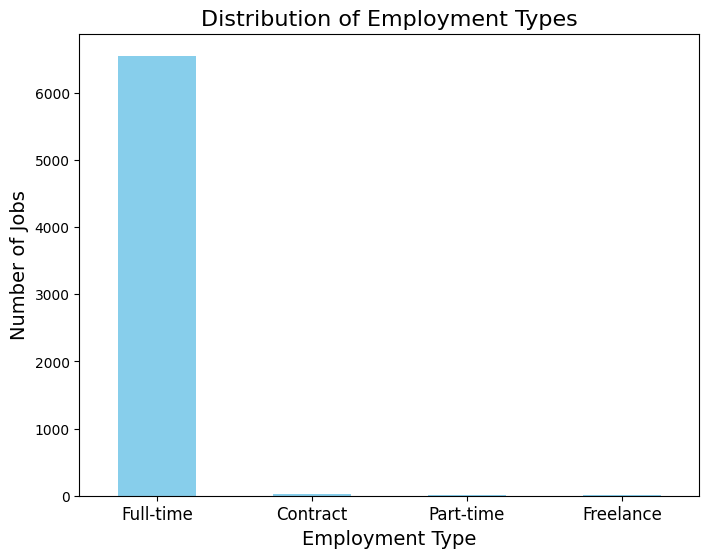

In [10]:
# Count the occurrences of each employment type
employment_type_counts = dataset['employment_type'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
employment_type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Employment Types', fontsize=16)
plt.xlabel('Employment Type', fontsize=14)
plt.ylabel('Number of Jobs', fontsize=14)
plt.xticks(rotation=0, ha='center', fontsize=12)
plt.show()

Now we need to transform our data to make predictions models and clustering.

We will use label encoder to preprocess our data.

In [11]:
# List of columns to label encode
columns_to_encode = ['job_title','experience_level', 'employment_type', 'work_models', 
                      'employee_residence', 'company_location', 'company_size']

# Apply label encoding
label_encoder = LabelEncoder()
for column in columns_to_encode:
    dataset[column] = label_encoder.fit_transform(dataset[column])

# Display the resulting DataFrame with label encoding
print(dataset)

      job_title  experience_level  employment_type  work_models  work_year  \
0            46                 2                2            2       2024   
1            46                 2                2            2       2024   
2            73                 3                2            2       2024   
3            73                 3                2            2       2024   
4            19                 2                2            1       2024   
...         ...               ...              ...          ...        ...   
6594        129                 0                0            0       2020   
6595        129                 1                2            1       2020   
6596        102                 3                2            0       2020   
6597         46                 2                2            0       2020   
6598         73                 3                2            1       2020   

      employee_residence  salary salary_currency  salary_in_usd

Now I woould like to conduct further analysis including data clusering into Test set and train set by using K-Means clustering.

C:\Users\piotr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


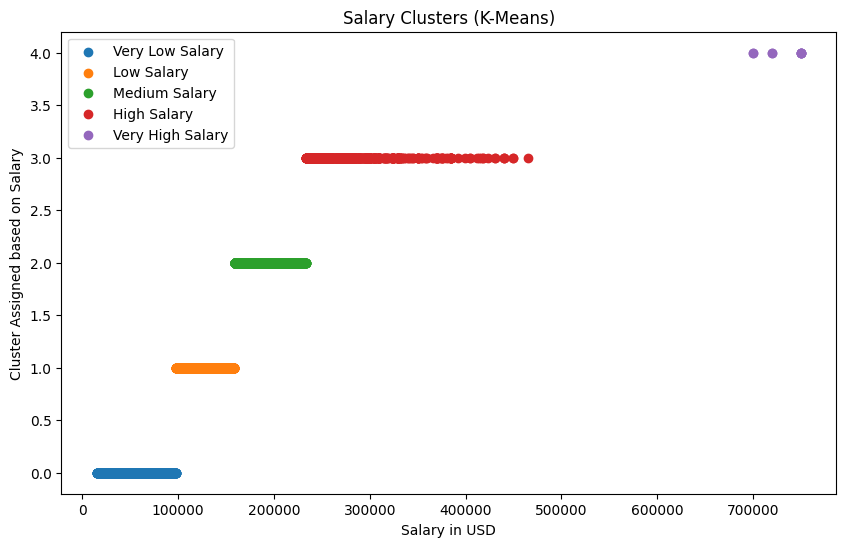

In [12]:
# Extract and preprocess relevant features
features = dataset[['salary_in_usd']]

# Apply K-Means clustering
k = 5  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=k, random_state=42)
dataset['Salary Cluster'] = kmeans.fit_predict(features)

# Sort clusters based on mean values
cluster_means = dataset.groupby('Salary Cluster')['salary_in_usd'].mean().sort_values().index
cluster_mapping = {old_label: new_label for new_label, old_label in enumerate(cluster_means)}
dataset['Salary Cluster'] = dataset['Salary Cluster'].map(cluster_mapping)

# Create a mapping for cluster names
cluster_names = {
    0: 'Very Low Salary',
    1: 'Low Salary',
    2: 'Medium Salary',
    3: 'High Salary',
    4: 'Very High Salary'
}

# Visualize the clusters
plt.figure(figsize=(10, 6))

for cluster_label in range(k):
    cluster_data = dataset[dataset['Salary Cluster'] == cluster_label]
    plt.scatter(cluster_data['salary_in_usd'], [cluster_label] * len(cluster_data), label=f'{cluster_names[cluster_label]}')

plt.title('Salary Clusters (K-Means)')
plt.xlabel('Salary in USD')
plt.ylabel('Cluster Assigned based on Salary')
plt.legend()
plt.show()


Here we will try to obtain best number of clusters and we will see does our clusters are nicely divided?

Elbow Method:
Plot the within-cluster sum of squares (inertia) against the number of clusters. The "elbow" of the curve is a good indicator of the optimal number of clusters.

C:\Users\piotr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\piotr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\piotr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

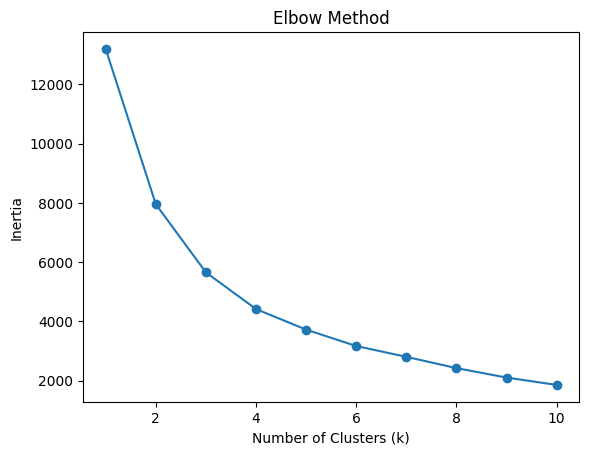

In [13]:
data_for_clustering = dataset[['job_title', 'salary_in_usd']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


Silhouette Score:
Calculate the silhouette score for different values of K. The silhouette score measures how well-separated the clusters are.

C:\Users\piotr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\piotr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\piotr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

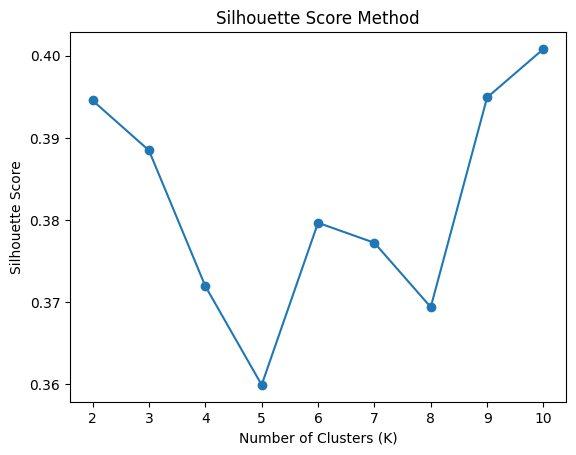

In [14]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    silhouette_scores.append(silhouette_score(scaled_data, labels))

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()

Final Clusters With Job titles (Better Visualisation with best proven cluster number)

In [15]:
features = dataset[['job_title']]

# Apply K-Means clustering
k = 5  # Adjust the number of clusters as needed
n_init_value = 10  
kmeans = KMeans(n_clusters=k, random_state=42, n_init=n_init_value)
dataset['Job_Cluster'] = kmeans.fit_predict(features)

# Sort clusters based on mean values
cluster_means = dataset.groupby('Job_Cluster')['job_title'].mean().sort_values().index
cluster_mapping = {old_label: new_label for new_label, old_label in enumerate(cluster_means)}
dataset['Job_Cluster'] = dataset['Job_Cluster'].map(cluster_mapping)


C:\Users\piotr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


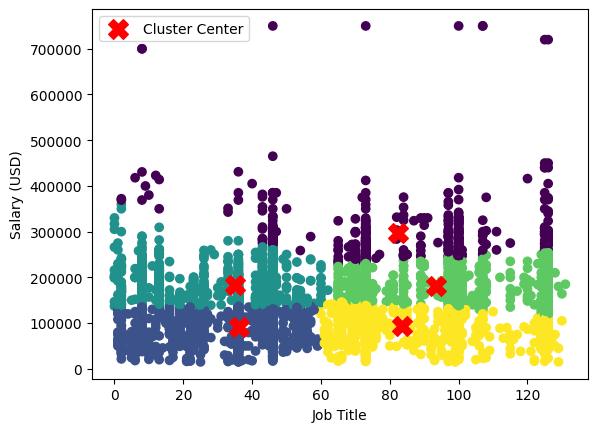

In [16]:
data_for_clustering = dataset[['job_title', 'salary_in_usd']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# Choose the number of clusters (K)
kmeans = KMeans(n_clusters=5, random_state=42)
dataset['salary_range_k'] = kmeans.fit_predict(scaled_data)

# Reverse transform cluster centers to original scale
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_info = pd.DataFrame(cluster_centers, columns=['job_title', 'salary_in_usd'])

# Scatter plot of job title vs salary with color-coded clusters
plt.scatter(dataset['job_title'], dataset['salary_in_usd'], c=dataset['salary_range_k'], cmap='viridis')
plt.scatter(cluster_info['job_title'], cluster_info['salary_in_usd'], marker='X', s=200, c='red', label='Cluster Center')
plt.xlabel('Job Title')
plt.ylabel('Salary (USD)')
plt.legend()
plt.show()

Now we will start predicting our salary based on different regression and classification models.

First the simplest regression model OLS

Mean Absolute Error: 145023.1649552891
Mean Squared Error: 26075700202.023186
R-squared: -3.436906057548269

Model Summary:
                                 OLS Regression Results                                
Dep. Variable:          salary_in_usd   R-squared (uncentered):                   0.032
Model:                            OLS   Adj. R-squared (uncentered):              0.031
Method:                 Least Squares   F-statistic:                              21.79
Date:                Sun, 10 Mar 2024   Prob (F-statistic):                    6.07e-33
Time:                        17:23:16   Log-Likelihood:                         -70704.
No. Observations:                5279   AIC:                                  1.414e+05
Df Residuals:                    5271   BIC:                                  1.415e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                               

C:\Users\piotr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


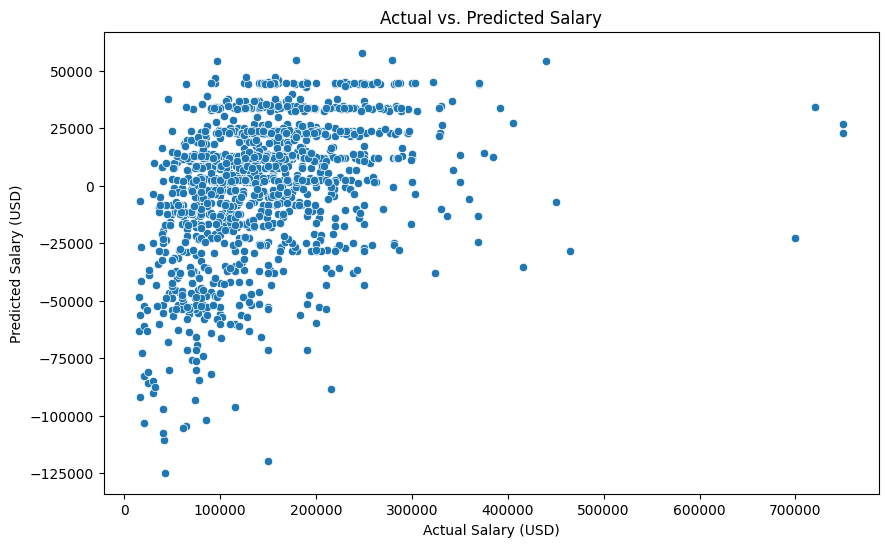

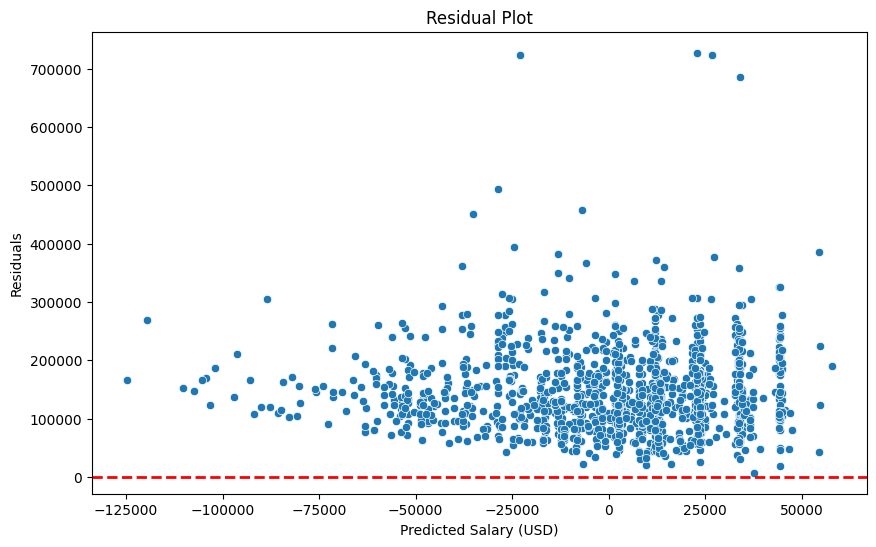

In [17]:
# Assuming 'X' contains your features (numerical and encoded) and 'y' is the target variable (salary_in_usd)
selected_features = ['job_title', 'experience_level', 'employment_type', 'work_models',
                      'work_year', 'employee_residence', 'company_location', 'company_size']

X = dataset[selected_features]
y = dataset['salary_in_usd']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant term for the intercept
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the OLS model
model = sm.OLS(y_train, X_train_scaled).fit()

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae_ols = mean_absolute_error(y_test, y_pred)
mse_ols = mean_squared_error(y_test, y_pred)
r2_ols = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae_ols}')
print(f'Mean Squared Error: {mse_ols}')
print(f'R-squared: {r2_ols}')

# Display the model summary
print('\nModel Summary:')
print(model.summary())

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Actual vs. Predicted Salary')
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('Residual Plot')
plt.xlabel('Predicted Salary (USD)')
plt.ylabel('Residuals')
plt.show()


ARDL

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ARDL Model (assuming all features are lagged)
X_train = sm.add_constant(X_train.shift(1).dropna())
X_test = sm.add_constant(X_test.shift(1).dropna())
ardl_model = sm.OLS(y_train.shift(1).dropna(), X_train).fit()

# Make predictions on the test set
y_ardl_pred = ardl_model.predict(X_test)

# Evaluate the ARDL model
mae_ardl = mean_absolute_error(y_test.shift(1).dropna(), y_ardl_pred)
mse_ardl = mean_squared_error(y_test.shift(1).dropna(), y_ardl_pred)
r2_ardl = r2_score(y_test.shift(1).dropna(), y_ardl_pred)

print('\nARDL Model:')
print(f'Mean Absolute Error: {mae_ardl}')
print(f'Mean Squared Error: {mse_ardl}')
print(f'R-squared: {r2_ardl}')

# Display the model summary
print('\nModel Summary:')
print(ardl_model.summary())


ARDL Model:
Mean Absolute Error: 50941.62629499798
Mean Squared Error: 5043895093.092183
R-squared: 0.14114521815019732

Model Summary:
                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     137.4
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          2.23e-210
Time:                        17:23:30   Log-Likelihood:                -65830.
No. Observations:                5278   AIC:                         1.317e+05
Df Residuals:                    5269   BIC:                         1.317e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.02

Random forest model to asses features importance


Random Forest Model:
Mean Absolute Error: 45485.29005648429
Mean Squared Error: 4164391211.7035303
R-squared: 0.2914087656302108


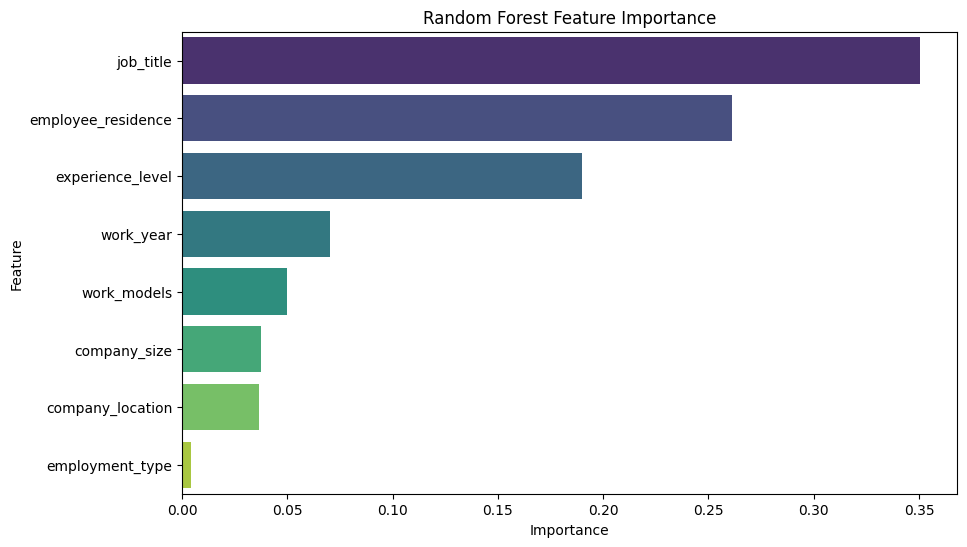

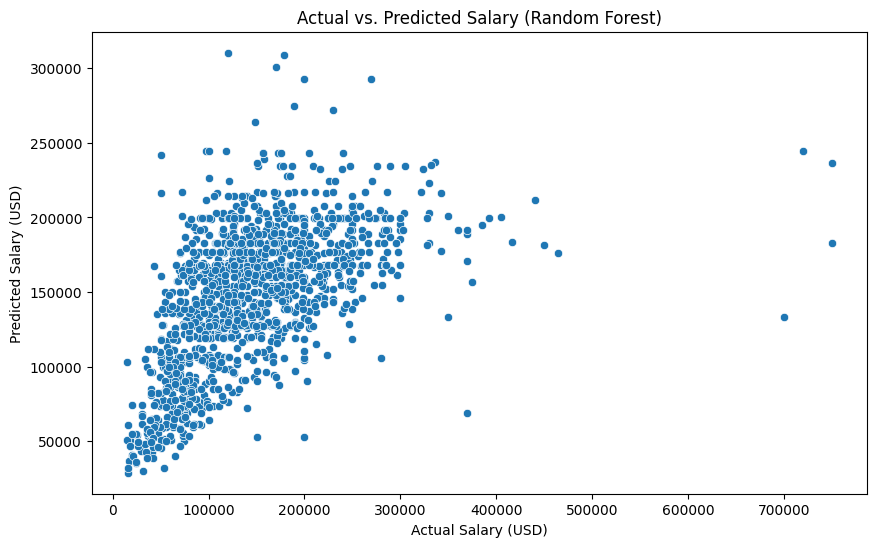

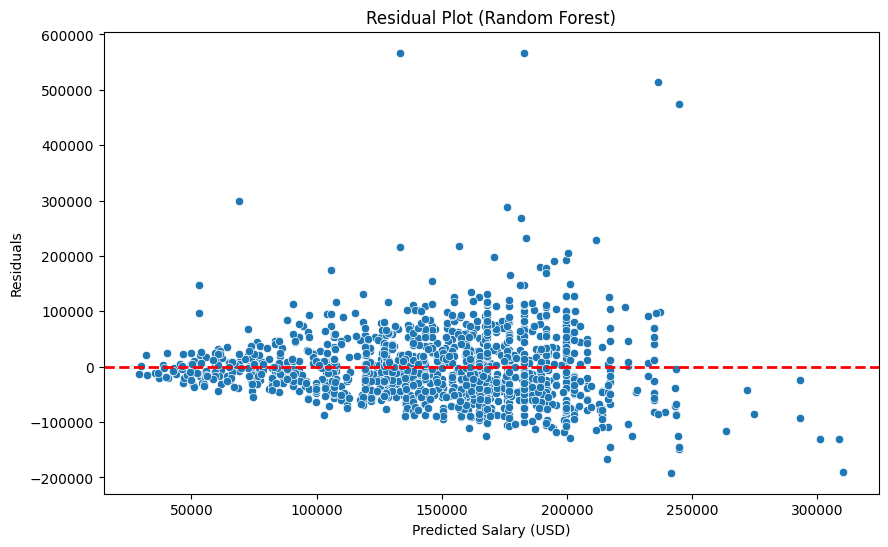

In [19]:
X = dataset[selected_features]
y = dataset['salary_in_usd']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set for Random Forest
y_rf_pred = rf_model.predict(X_test)

# Evaluate the Random Forest model
mae_rf = mean_absolute_error(y_test, y_rf_pred)
mse_rf = mean_squared_error(y_test, y_rf_pred)
r2_rf = r2_score(y_test, y_rf_pred)

print('\nRandom Forest Model:')
print(f'Mean Absolute Error: {mae_rf}')
print(f'Mean Squared Error: {mse_rf}')
print(f'R-squared: {r2_rf}')

# Feature importance for Random Forest
feature_importance_rf = rf_model.feature_importances_
feature_importance_df_rf = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importance_rf})
feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False)

# Plotting feature importance for Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_rf, hue='Feature', palette='viridis', dodge=False)
plt.title('Random Forest Feature Importance')
plt.show()

# Visualize the predicted vs actual values for Random Forest
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_rf_pred)
plt.title('Actual vs. Predicted Salary (Random Forest)')
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.show()

# Residual plot for Random Forest
residuals_rf = y_test - y_rf_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_rf_pred, y=residuals_rf)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('Residual Plot (Random Forest)')
plt.xlabel('Predicted Salary (USD)')
plt.ylabel('Residuals')
plt.show()

Now Decision Tree model

Mean Absolute Error: 47396.29166648201
Mean Squared Error: 4646725503.833931
R-squared: 0.20933726128186025


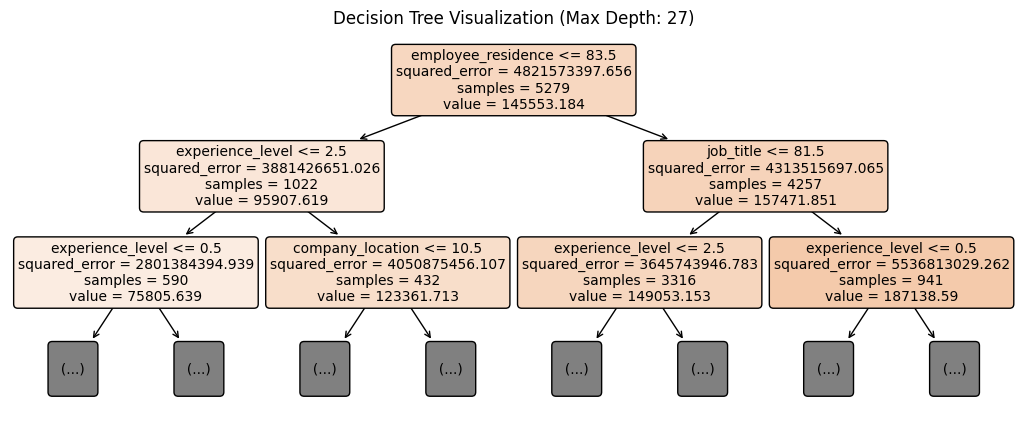

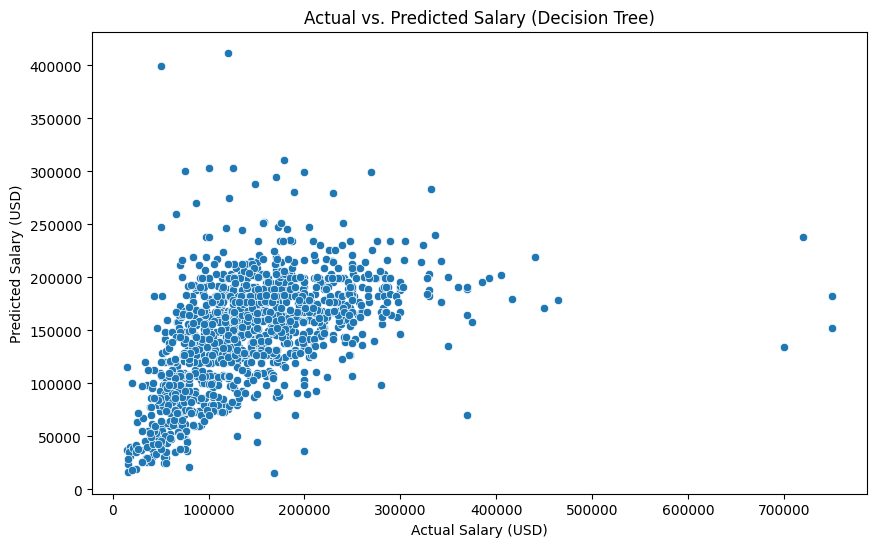

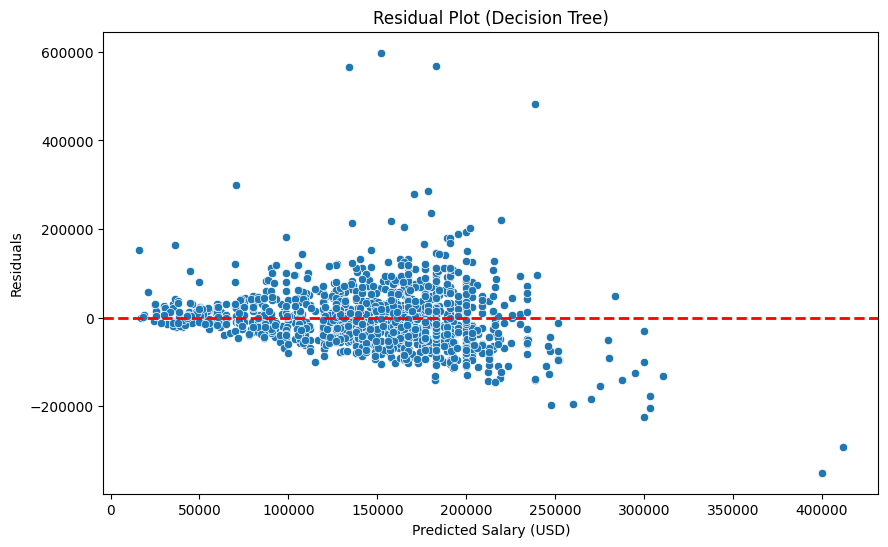

In [20]:
X = dataset[selected_features]
y = dataset['salary_in_usd']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
mae_dt = mean_absolute_error(y_test, y_pred)
mse_dt = mean_squared_error(y_test, y_pred)
r2_dt = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae_dt}')
print(f'Mean Squared Error: {mse_dt}')
print(f'R-squared: {r2_dt}')

# Get the maximum depth of the Decision Tree
max_depth = dt_model.get_depth()

# Visualize the Decision Tree
plt.figure(figsize=(13, 5))
plot_tree(dt_model, feature_names=selected_features, filled=True, rounded=True, fontsize=10, max_depth=2)  # Adjust max_depth as needed
plt.title(f'Decision Tree Visualization (Max Depth: {max_depth})')
plt.show()

# Visualize the predicted vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Actual vs. Predicted Salary (Decision Tree)')
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('Residual Plot (Decision Tree)')
plt.xlabel('Predicted Salary (USD)')
plt.ylabel('Residuals')
plt.show()

SVM


Support Vector Machine (SVM) Model:
Mean Absolute Error: 55904.24946116793
Mean Squared Error: 5913442749.283531
R-squared: -0.006200782797205928


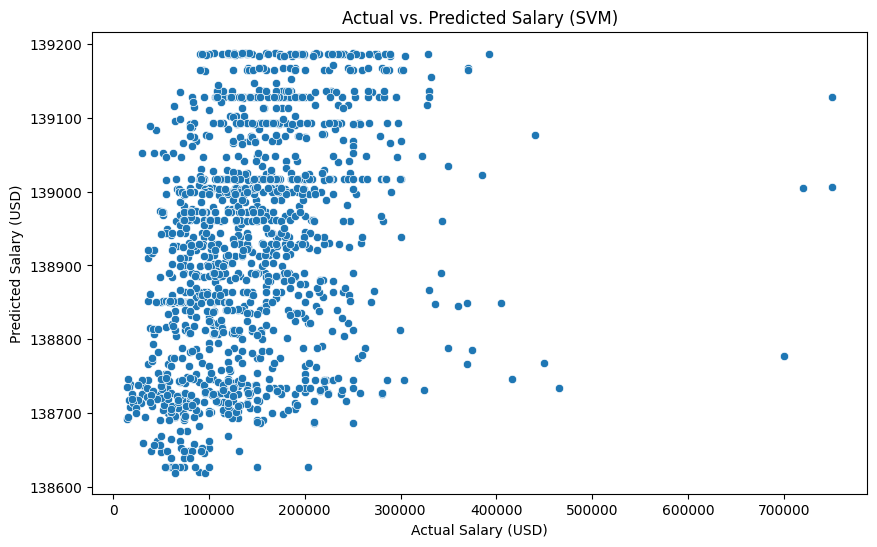

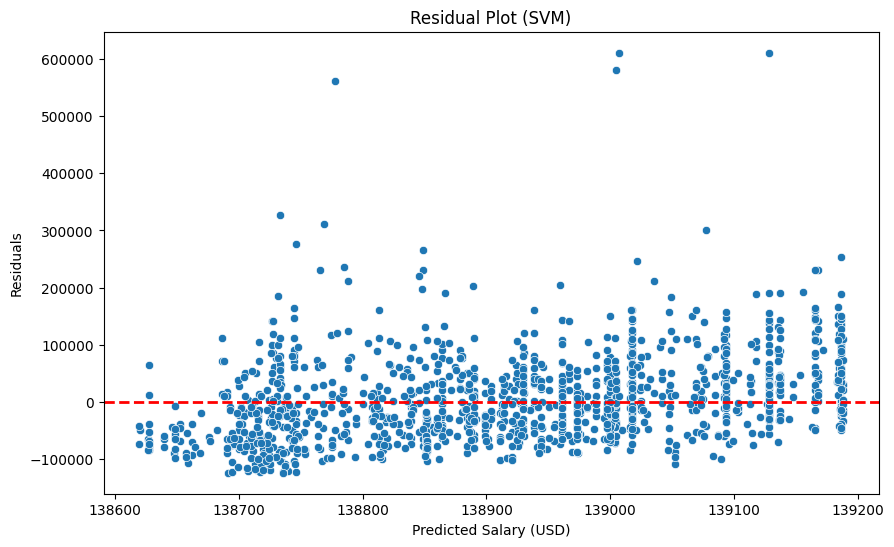

In [21]:
X = dataset[selected_features]
y = dataset['salary_in_usd']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM Model
svm_model = make_pipeline(StandardScaler(), SVR())
svm_model.fit(X_train, y_train)

# Make predictions on the test set for SVM
y_svm_pred = svm_model.predict(X_test)

# Evaluate the SVM model
mae_svm = mean_absolute_error(y_test, y_svm_pred)
mse_svm = mean_squared_error(y_test, y_svm_pred)
r2_svm = r2_score(y_test, y_svm_pred)

print('\nSupport Vector Machine (SVM) Model:')
print(f'Mean Absolute Error: {mae_svm}')
print(f'Mean Squared Error: {mse_svm}')
print(f'R-squared: {r2_svm}')

# Visualize the predicted vs actual values for SVM
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_svm_pred)
plt.title('Actual vs. Predicted Salary (SVM)')
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.show()

# Residual plot for SVM
residuals_svm = y_test - y_svm_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_svm_pred, y=residuals_svm)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('Residual Plot (SVM)')
plt.xlabel('Predicted Salary (USD)')
plt.ylabel('Residuals')
plt.show()


GradientBoostingRegressor


Gradient Boosting Model:
Mean Absolute Error: 44580.76354668301
Mean Squared Error: 4068644386.9299374
R-squared: 0.3077005493038092


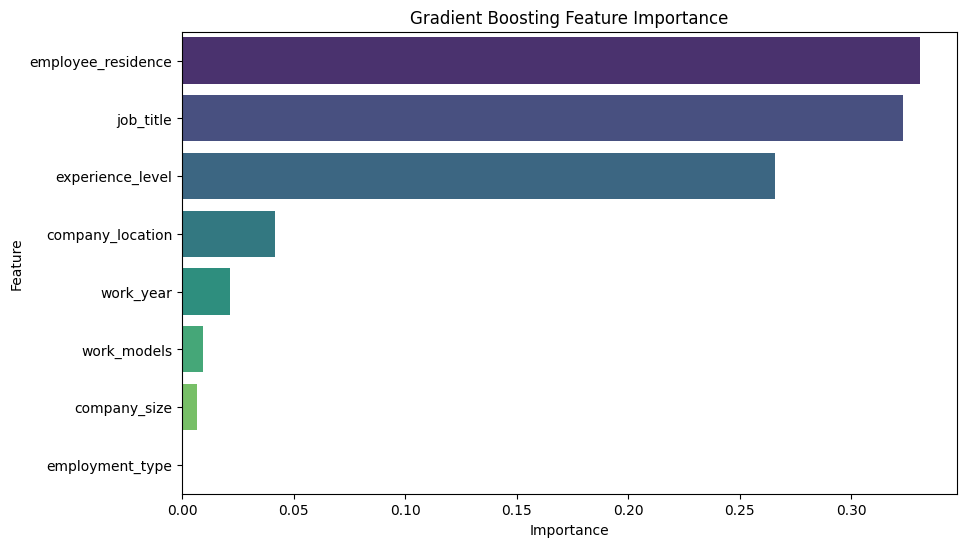

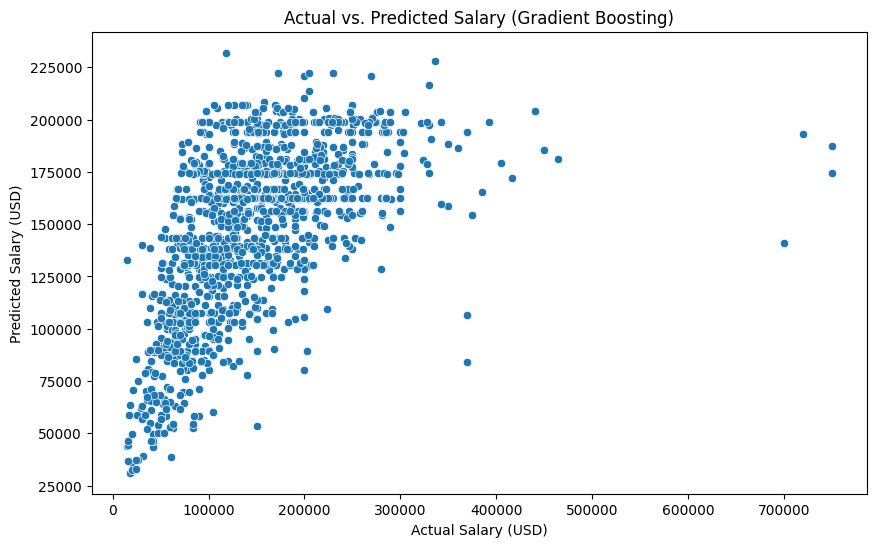

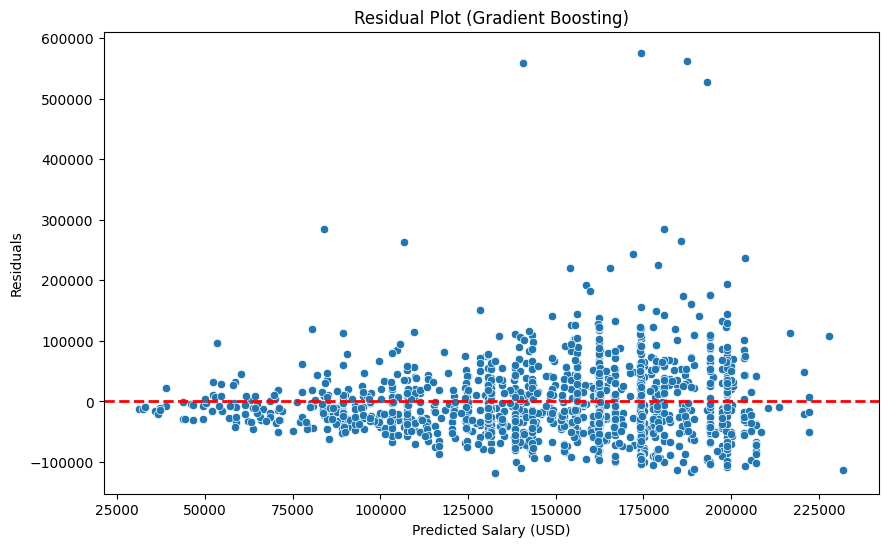

In [22]:
from sklearn.ensemble import GradientBoostingRegressor

# Your dataset and selected features
X = dataset[selected_features]
y = dataset['salary_in_usd']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting Model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions on the test set for Gradient Boosting
y_gb_pred = gb_model.predict(X_test)

# Evaluate the Gradient Boosting model
mae_gb = mean_absolute_error(y_test, y_gb_pred)
mse_gb = mean_squared_error(y_test, y_gb_pred)
r2_gb = r2_score(y_test, y_gb_pred)

print('\nGradient Boosting Model:')
print(f'Mean Absolute Error: {mae_gb}')
print(f'Mean Squared Error: {mse_gb}')
print(f'R-squared: {r2_gb}')

# Feature importance for Gradient Boosting
feature_importance_gb = gb_model.feature_importances_
feature_importance_df_gb = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importance_gb})
feature_importance_df_gb = feature_importance_df_gb.sort_values(by='Importance', ascending=False)

# Plotting feature importance for Gradient Boosting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_gb, hue='Feature', palette='viridis', dodge=False)
plt.title('Gradient Boosting Feature Importance')
plt.show()

# Visualize the predicted vs actual values for Gradient Boosting
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_gb_pred)
plt.title('Actual vs. Predicted Salary (Gradient Boosting)')
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.show()

# Residual plot for Gradient Boosting
residuals_gb = y_test - y_gb_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_gb_pred, y=residuals_gb)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('Residual Plot (Gradient Boosting)')
plt.xlabel('Predicted Salary (USD)')
plt.ylabel('Residuals')
plt.show()


Now we will try to evaluate performance of our models.

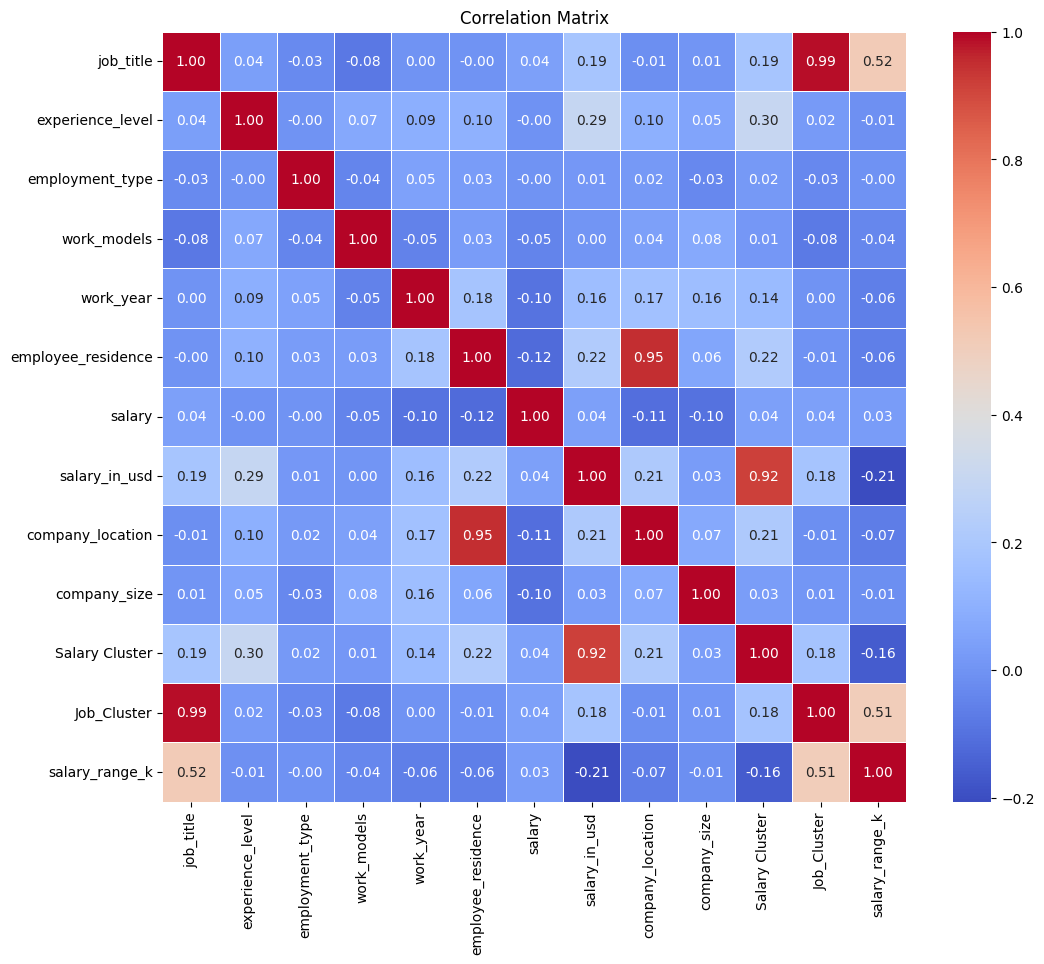

In [23]:
# Selecting only numeric columns for correlation matrix
numeric_columns = dataset.select_dtypes(include=['int32', 'int64']).columns
numeric_data = dataset[numeric_columns]

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

FINAL STEP
EVALUTAION OF MODELS

In [24]:
# Create a DataFrame for the final evaluation table
evaluation_results = {
    'Metric': ['Mean Absolute Error', 'Mean Squared Error', 'R-squared'],
    'Random Forest': [mae_rf, mse_rf, r2_rf],
    'Decision Tree': [mae_dt, mse_dt, r2_dt],
    'OLS': [mae_ols, mse_ols, r2_ols],
    'Gradient Boosting': [mae_gb, mse_gb, r2_gb],
    'SVM': [mae_svm, mse_svm, r2_svm],  
    'ARDL': [mae_ardl, mse_ardl, r2_ardl]  
}

evaluation_df = pd.DataFrame(evaluation_results)

# Print the final evaluation table
print('\nFinal Evaluation Table:')
print(evaluation_df)



Final Evaluation Table:
                Metric  Random Forest  Decision Tree           OLS  \
0  Mean Absolute Error   4.548529e+04   4.739629e+04  1.450232e+05   
1   Mean Squared Error   4.164391e+09   4.646726e+09  2.607570e+10   
2            R-squared   2.914088e-01   2.093373e-01 -3.436906e+00   

   Gradient Boosting           SVM          ARDL  
0       4.458076e+04  5.590425e+04  5.094163e+04  
1       4.068644e+09  5.913443e+09  5.043895e+09  
2       3.077005e-01 -6.200783e-03  1.411452e-01  


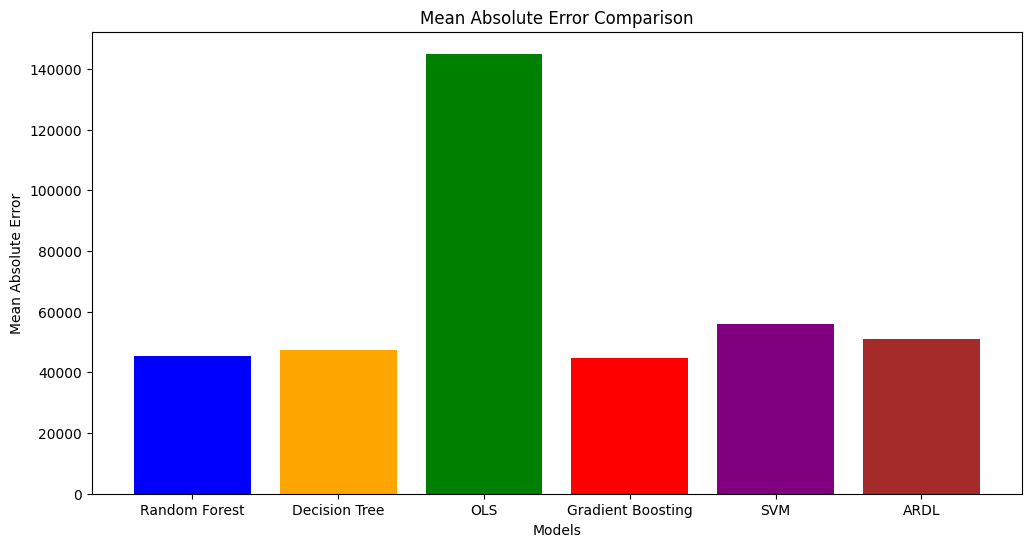

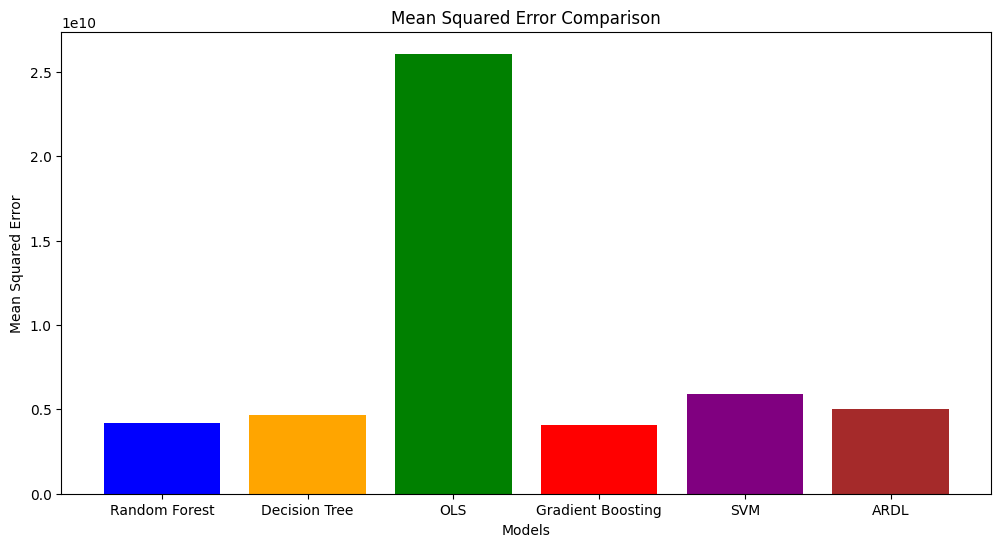

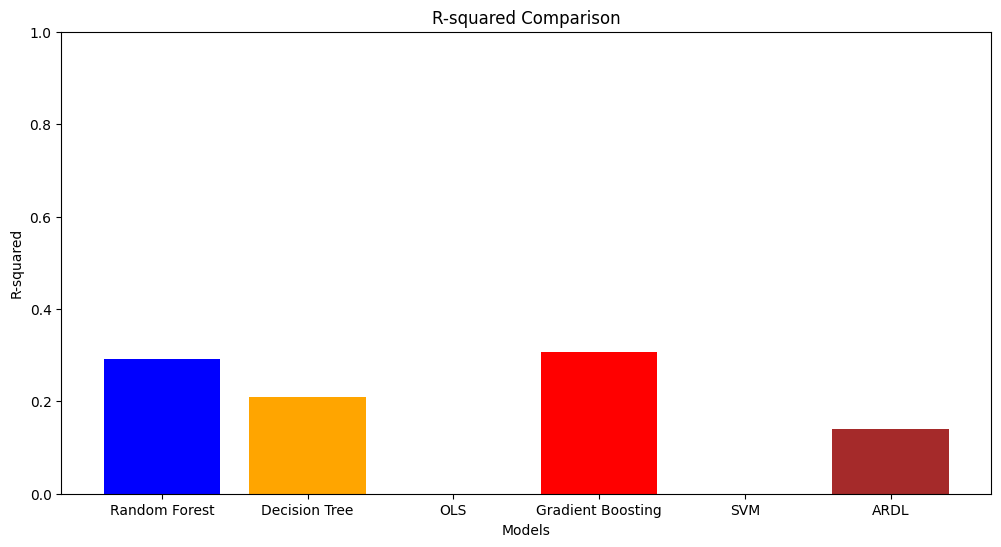

In [25]:
# Evaluation results
models = ['Random Forest', 'Decision Tree', 'OLS', 'Gradient Boosting', 'SVM', 'ARDL']
mae_values = [mae_rf, mae_dt, mae_ols, mae_gb, mae_svm, mae_ardl]
mse_values = [mse_rf, mse_dt, mse_ols, mse_gb, mse_svm, mse_ardl]
r2_values = [r2_rf, r2_dt, r2_ols, r2_gb, r2_svm, r2_ardl]

# Plotting Mean Absolute Error
plt.figure(figsize=(12, 6))
plt.bar(models, mae_values, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.title('Mean Absolute Error Comparison')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error')
plt.show()

# Plotting Mean Squared Error
plt.figure(figsize=(12, 6))
plt.bar(models, mse_values, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.title('Mean Squared Error Comparison')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.show()

# Plotting R-squared
plt.figure(figsize=(12, 6))
plt.bar(models, r2_values, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.title('R-squared Comparison')
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.ylim(0, 1) 
plt.show()


As we can see, this task to predict salary based on regression models like OLS and SVM gave very poor results.

The reason for that is because we are mostly using categorical data to make future forecast with is not the best idea.

In order to obtain better results on those data, we should use classification models like RF and DT or Gradient Boosting which combines predictions of weak learners sequentially to create stron predictive model.
In our evaluation Grandient Boosting has the highest R2 and low MAE and MSE so we can choose this model as a Winner in conducting this type of classification task.


 We can try to improve our perfermace by adding new columns with normalized data to see does it changes anything?

In [28]:
# List of numerical columns to normalize
numerical_columns = ['job_title', 'experience_level', 'employment_type', 'work_models',
                      'employee_residence', 'company_location', 'company_size', 'Salary Cluster', 'Job_Cluster','salary_range_k' ]

# Normalize numerical columns using Min-Max scaling
scaler = MinMaxScaler()
dataset[numerical_columns] = scaler.fit_transform(dataset[numerical_columns])

# Display the resulting DataFrame with label encoding and normalization
print(dataset)

      job_title  experience_level  employment_type  work_models  work_year  \
0      0.351145          0.666667         0.666667          1.0       2024   
1      0.351145          0.666667         0.666667          1.0       2024   
2      0.557252          1.000000         0.666667          1.0       2024   
3      0.557252          1.000000         0.666667          1.0       2024   
4      0.145038          0.666667         0.666667          0.5       2024   
...         ...               ...              ...          ...        ...   
6594   0.984733          0.000000         0.000000          0.0       2020   
6595   0.984733          0.333333         0.666667          0.5       2020   
6596   0.778626          1.000000         0.666667          0.0       2020   
6597   0.351145          0.666667         0.666667          0.0       2020   
6598   0.557252          1.000000         0.666667          0.5       2020   

      employee_residence  salary salary_currency  salary_in_usd

#Now we will conduct analysis with the same models as before starting with OLS model.

Mean Absolute Error: 146742.20312367592
Mean Squared Error: 22576451370.385303
R-squared: -2.841492004706912

Model Summary:
                                 OLS Regression Results                                
Dep. Variable:          salary_in_usd   R-squared (uncentered):                   0.160
Model:                            OLS   Adj. R-squared (uncentered):              0.158
Method:                 Least Squares   F-statistic:                              100.3
Date:                Sun, 10 Mar 2024   Prob (F-statistic):                   6.59e-191
Time:                        17:47:08   Log-Likelihood:                         -70330.
No. Observations:                5279   AIC:                                  1.407e+05
Df Residuals:                    5269   BIC:                                  1.407e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                              

C:\Users\piotr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


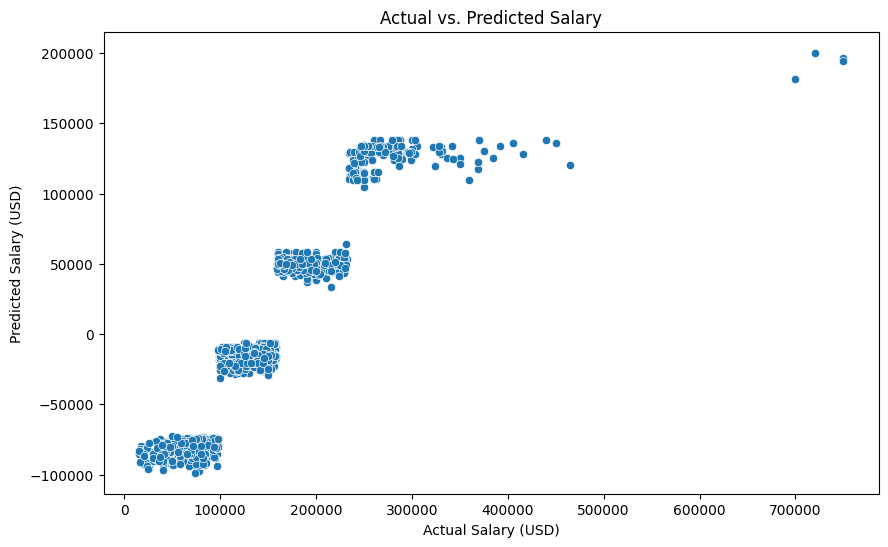

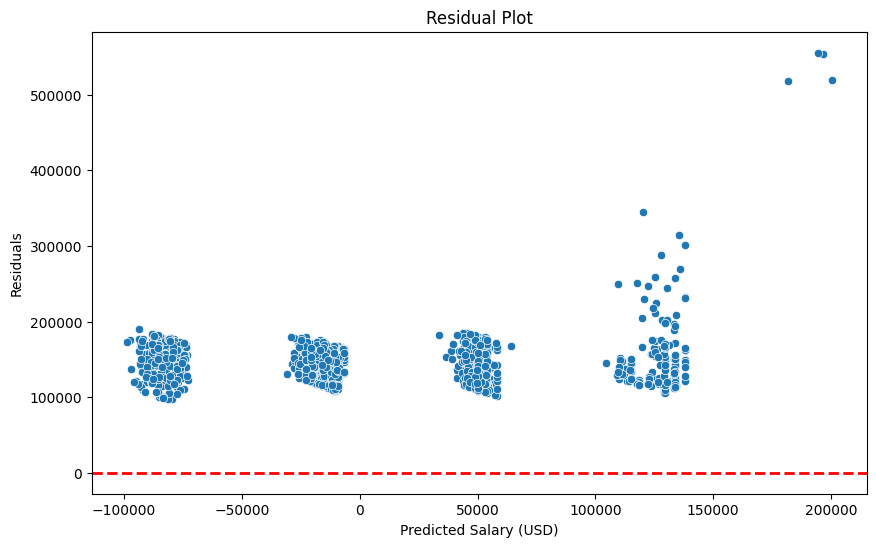

In [34]:
# Assuming 'X' contains your features (numerical and encoded) and 'y' is the target variable (salary_in_usd)
X = dataset[numerical_columns]
y = dataset['salary_in_usd']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant term for the intercept
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the OLS model
model = sm.OLS(y_train, X_train_scaled).fit()

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae_ols = mean_absolute_error(y_test, y_pred)
mse_ols = mean_squared_error(y_test, y_pred)
r2_ols = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae_ols}')
print(f'Mean Squared Error: {mse_ols}')
print(f'R-squared: {r2_ols}')

# Display the model summary
print('\nModel Summary:')
print(model.summary())

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Actual vs. Predicted Salary')
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('Residual Plot')
plt.xlabel('Predicted Salary (USD)')
plt.ylabel('Residuals')
plt.show()


In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ARDL Model (assuming all features are lagged)
X_train = sm.add_constant(X_train.shift(1).dropna())
X_test = sm.add_constant(X_test.shift(1).dropna())
ardl_model = sm.OLS(y_train.shift(1).dropna(), X_train).fit()

# Make predictions on the test set
y_ardl_pred = ardl_model.predict(X_test)

# Evaluate the ARDL model
mae_ardl = mean_absolute_error(y_test.shift(1).dropna(), y_ardl_pred)
mse_ardl = mean_squared_error(y_test.shift(1).dropna(), y_ardl_pred)
r2_ardl = r2_score(y_test.shift(1).dropna(), y_ardl_pred)

print('\nARDL Model:')
print(f'Mean Absolute Error: {mae_ardl}')
print(f'Mean Squared Error: {mse_ardl}')
print(f'R-squared: {r2_ardl}')

# Display the model summary
print('\nModel Summary:')
print(ardl_model.summary())


ARDL Model:
Mean Absolute Error: 19524.057143098995
Mean Squared Error: 1044797662.843485
R-squared: 0.8220959293884693

Model Summary:
                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     3299.
Date:                Sun, 10 Mar 2024   Prob (F-statistic):               0.00
Time:                        17:47:12   Log-Likelihood:                -61097.
No. Observations:                5278   AIC:                         1.222e+05
Df Residuals:                    5267   BIC:                         1.223e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.02

RF


Random Forest Model:
Mean Absolute Error: 14411.343645722882
Mean Squared Error: 395632418.47728956
R-squared: 0.9326812373012265


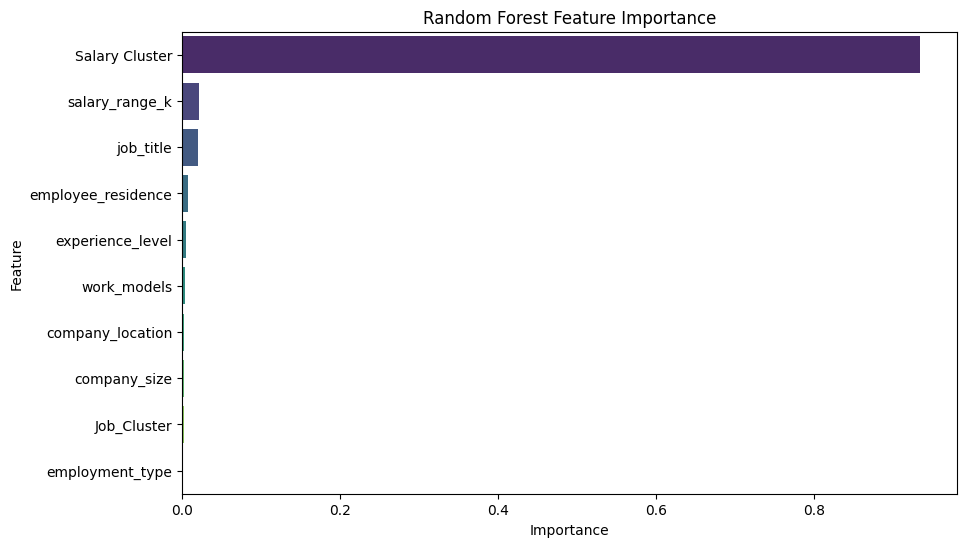

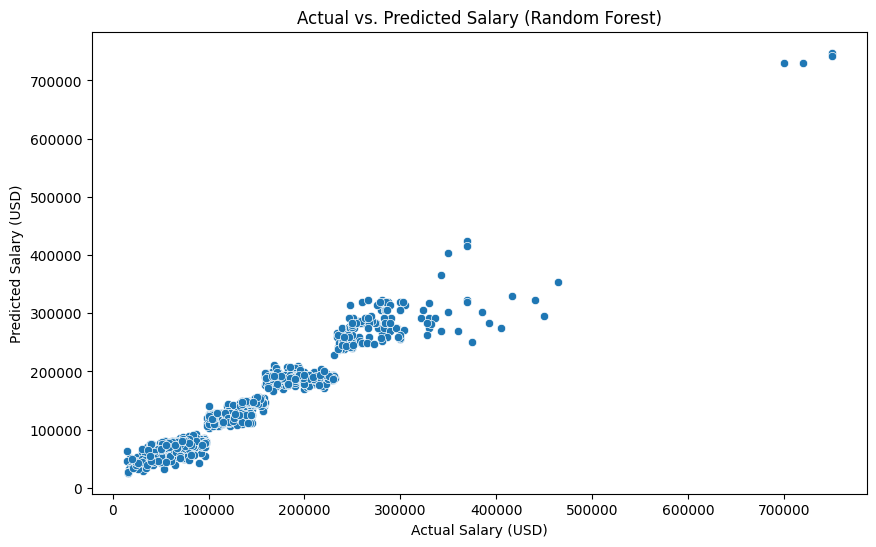

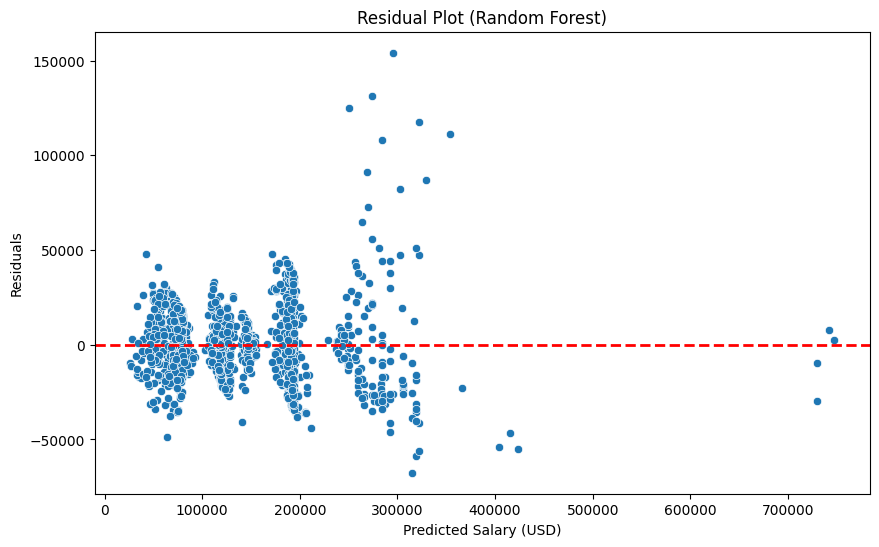

In [37]:
X = dataset[numerical_columns]
y = dataset['salary_in_usd']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set for Random Forest
y_rf_pred = rf_model.predict(X_test)

# Evaluate the Random Forest model
mae_rf = mean_absolute_error(y_test, y_rf_pred)
mse_rf = mean_squared_error(y_test, y_rf_pred)
r2_rf = r2_score(y_test, y_rf_pred)

print('\nRandom Forest Model:')
print(f'Mean Absolute Error: {mae_rf}')
print(f'Mean Squared Error: {mse_rf}')
print(f'R-squared: {r2_rf}')

# Feature importance for Random Forest
feature_importance_rf = rf_model.feature_importances_

# Assuming that X.columns gives you the list of feature names
feature_names = X.columns

feature_importance_df_rf = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance_rf})
feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False)

# Plotting feature importance for Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_rf, hue='Feature', palette='viridis', dodge=False)
plt.title('Random Forest Feature Importance')
plt.show()

# Visualize the predicted vs actual values for Random Forest
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_rf_pred)
plt.title('Actual vs. Predicted Salary (Random Forest)')
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.show()

# Residual plot for Random Forest
residuals_rf = y_test - y_rf_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_rf_pred, y=residuals_rf)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('Residual Plot (Random Forest)')
plt.xlabel('Predicted Salary (USD)')
plt.ylabel('Residuals')
plt.show()

DT

Mean Absolute Error: 14984.674825103975
Mean Squared Error: 438207411.6715693
R-squared: 0.9254368970250211


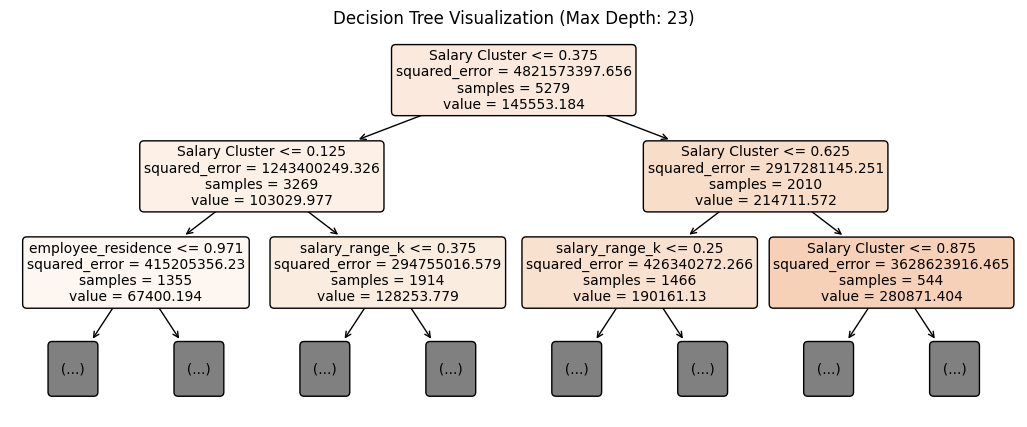

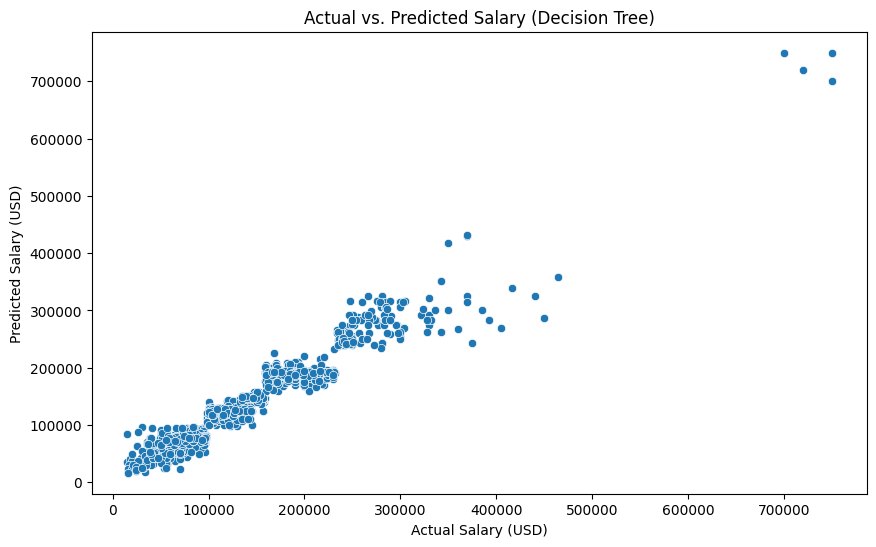

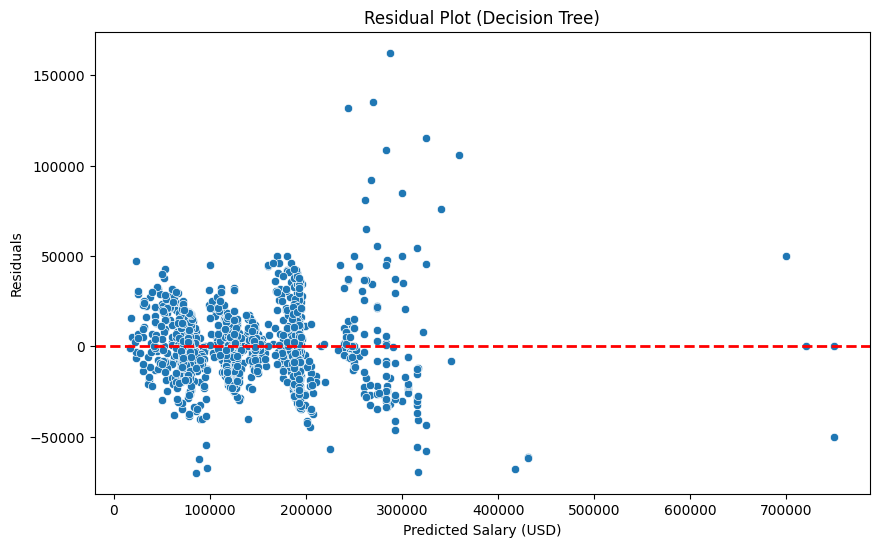

In [39]:
X = dataset[numerical_columns]
y = dataset['salary_in_usd']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
mae_dt = mean_absolute_error(y_test, y_pred)
mse_dt = mean_squared_error(y_test, y_pred)
r2_dt = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae_dt}')
print(f'Mean Squared Error: {mse_dt}')
print(f'R-squared: {r2_dt}')

# Get the maximum depth of the Decision Tree
max_depth = dt_model.get_depth()

# Visualize the Decision Tree
plt.figure(figsize=(13, 5))
plot_tree(dt_model, feature_names=X.columns, filled=True, rounded=True, fontsize=10, max_depth=2)  # Adjust max_depth as needed
plt.title(f'Decision Tree Visualization (Max Depth: {max_depth})')
plt.show()

# Visualize the predicted vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Actual vs. Predicted Salary (Decision Tree)')
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('Residual Plot (Decision Tree)')
plt.xlabel('Predicted Salary (USD)')
plt.ylabel('Residuals')
plt.show()

SVM


Support Vector Machine (SVM) Model:
Mean Absolute Error: 55748.78028534127
Mean Squared Error: 5890684125.737752
R-squared: -0.0023282933189023858


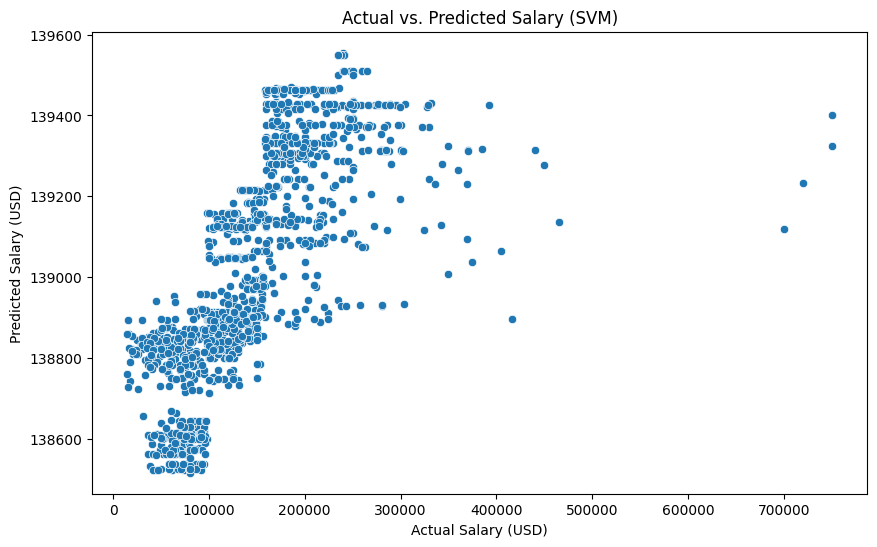

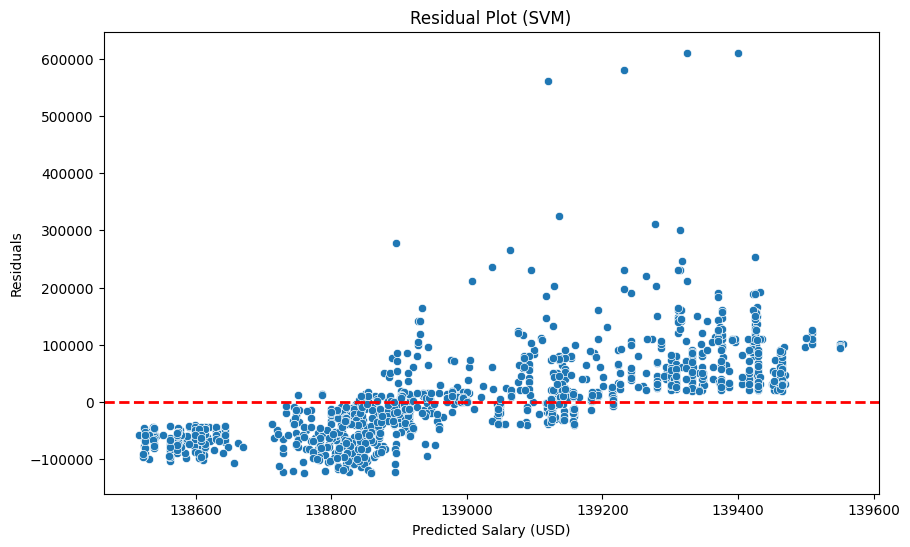

In [40]:
X = dataset[numerical_columns]
y = dataset['salary_in_usd']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM Model
svm_model = make_pipeline(StandardScaler(), SVR())
svm_model.fit(X_train, y_train)

# Make predictions on the test set for SVM
y_svm_pred = svm_model.predict(X_test)

# Evaluate the SVM model
mae_svm = mean_absolute_error(y_test, y_svm_pred)
mse_svm = mean_squared_error(y_test, y_svm_pred)
r2_svm = r2_score(y_test, y_svm_pred)

print('\nSupport Vector Machine (SVM) Model:')
print(f'Mean Absolute Error: {mae_svm}')
print(f'Mean Squared Error: {mse_svm}')
print(f'R-squared: {r2_svm}')

# Visualize the predicted vs actual values for SVM
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_svm_pred)
plt.title('Actual vs. Predicted Salary (SVM)')
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.show()

# Residual plot for SVM
residuals_svm = y_test - y_svm_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_svm_pred, y=residuals_svm)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('Residual Plot (SVM)')
plt.xlabel('Predicted Salary (USD)')
plt.ylabel('Residuals')
plt.show()


GB


Gradient Boosting Model:
Mean Absolute Error: 14263.360622525584
Mean Squared Error: 388201736.35679144
R-squared: 0.9339456036751579


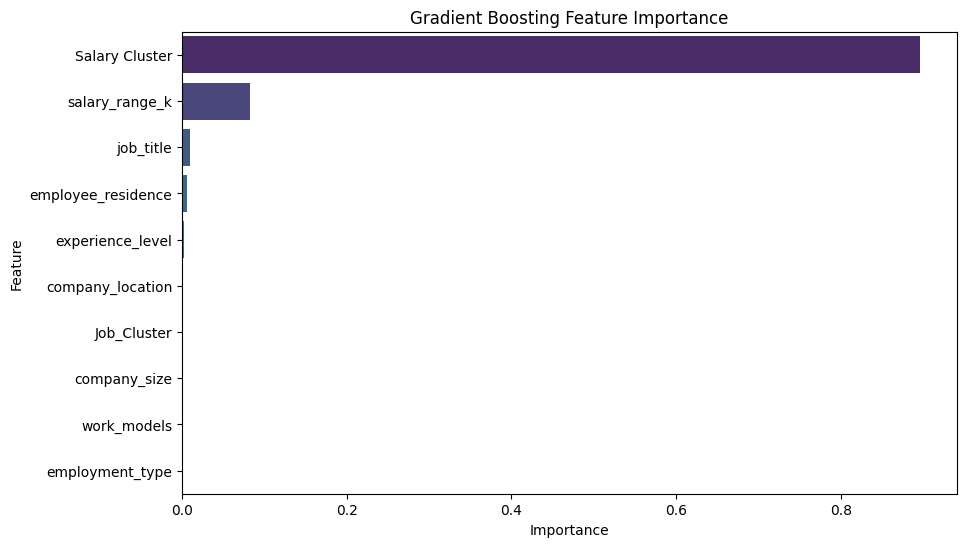

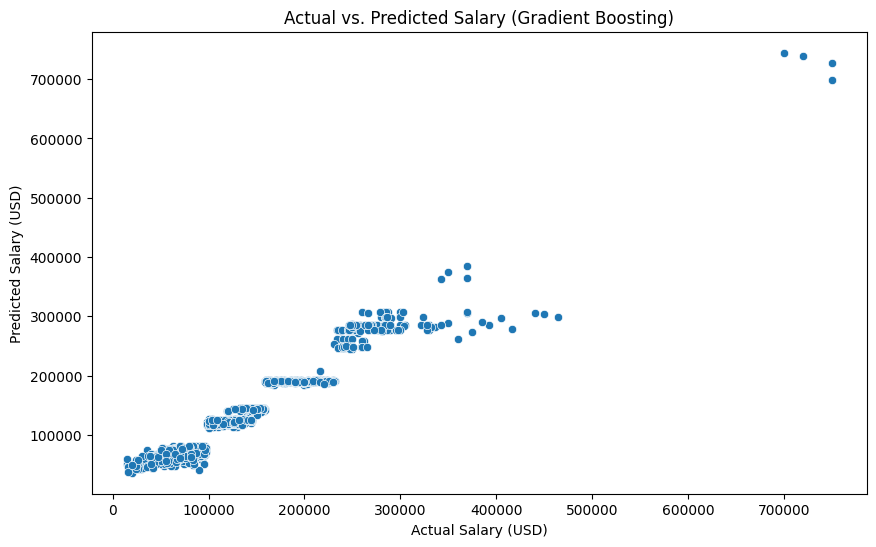

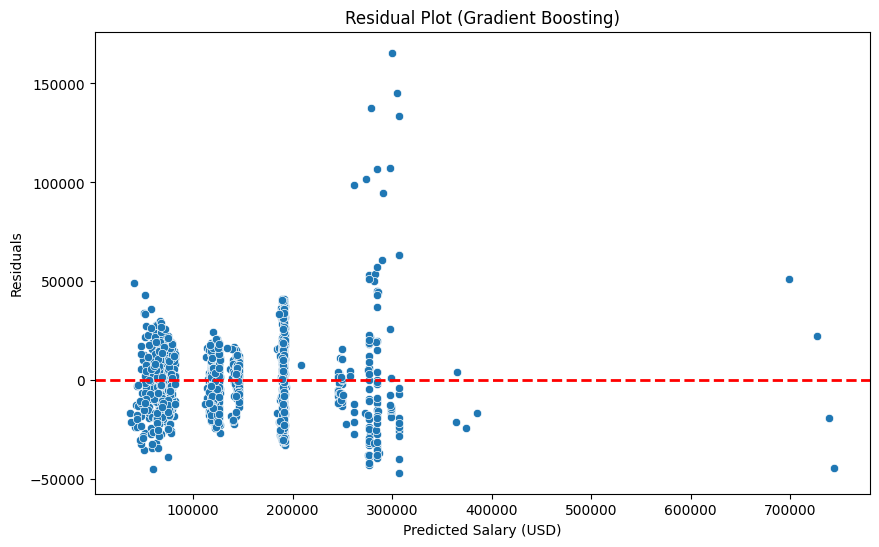

In [42]:
# Your dataset and selected features
X = dataset[numerical_columns]
y = dataset['salary_in_usd']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting Model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions on the test set for Gradient Boosting
y_gb_pred = gb_model.predict(X_test)

# Evaluate the Gradient Boosting model
mae_gb = mean_absolute_error(y_test, y_gb_pred)
mse_gb = mean_squared_error(y_test, y_gb_pred)
r2_gb = r2_score(y_test, y_gb_pred)

print('\nGradient Boosting Model:')
print(f'Mean Absolute Error: {mae_gb}')
print(f'Mean Squared Error: {mse_gb}')
print(f'R-squared: {r2_gb}')

# Feature importance for Gradient Boosting
feature_importance_gb = gb_model.feature_importances_

# Assuming X.columns gives you the list of feature names
feature_names_gb = X.columns

feature_importance_df_gb = pd.DataFrame({'Feature': feature_names_gb, 'Importance': feature_importance_gb})
feature_importance_df_gb = feature_importance_df_gb.sort_values(by='Importance', ascending=False)


# Plotting feature importance for Gradient Boosting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_gb, hue='Feature', palette='viridis', dodge=False)
plt.title('Gradient Boosting Feature Importance')
plt.show()

# Visualize the predicted vs actual values for Gradient Boosting
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_gb_pred)
plt.title('Actual vs. Predicted Salary (Gradient Boosting)')
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.show()

# Residual plot for Gradient Boosting
residuals_gb = y_test - y_gb_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_gb_pred, y=residuals_gb)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('Residual Plot (Gradient Boosting)')
plt.xlabel('Predicted Salary (USD)')
plt.ylabel('Residuals')
plt.show()


Second Evaluation

In [44]:
# Create a DataFrame for the final evaluation table
evaluation_results = {
    'Metric': ['Mean Absolute Error', 'Mean Squared Error', 'R-squared'],
    'Random Forest': [mae_rf, mse_rf, r2_rf],
    'Decision Tree': [mae_dt, mse_dt, r2_dt],
    'OLS': [mae_ols, mse_ols, r2_ols],
    'Gradient Boosting': [mae_gb, mse_gb, r2_gb],
    'SVM': [mae_svm, mse_svm, r2_svm],  
    'ARDL': [mae_ardl, mse_ardl, r2_ardl]  
}

evaluation_df = pd.DataFrame(evaluation_results)

# Print the final evaluation table
print('\nFinal Evaluation Table:')
print(evaluation_df)


Final Evaluation Table:
                Metric  Random Forest  Decision Tree           OLS  \
0  Mean Absolute Error   1.441134e+04   1.498467e+04  1.467422e+05   
1   Mean Squared Error   3.956324e+08   4.382074e+08  2.257645e+10   
2            R-squared   9.326812e-01   9.254369e-01 -2.841492e+00   

   Gradient Boosting           SVM          ARDL  
0       1.426336e+04  5.574878e+04  1.952406e+04  
1       3.882017e+08  5.890684e+09  1.044798e+09  
2       9.339456e-01 -2.328293e-03  8.220959e-01  


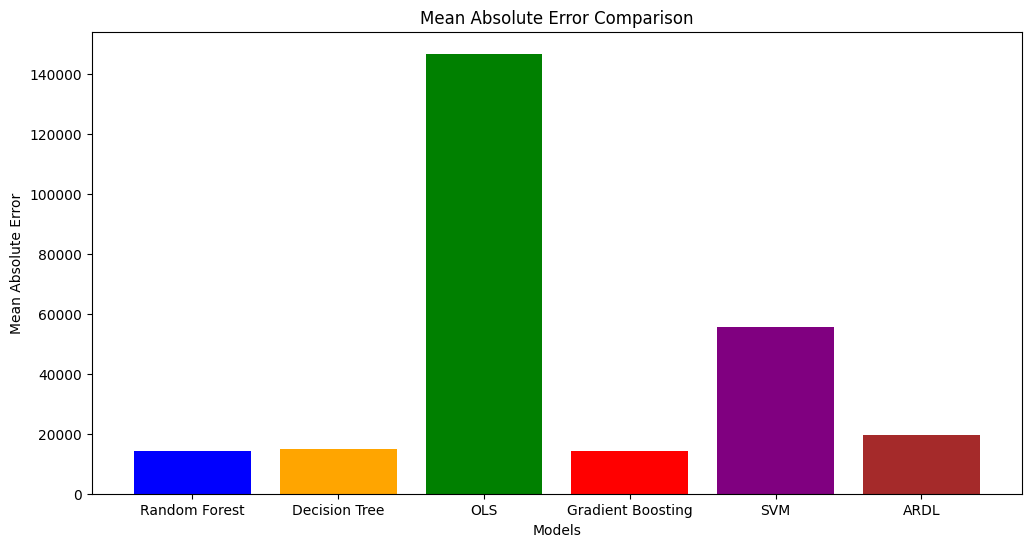

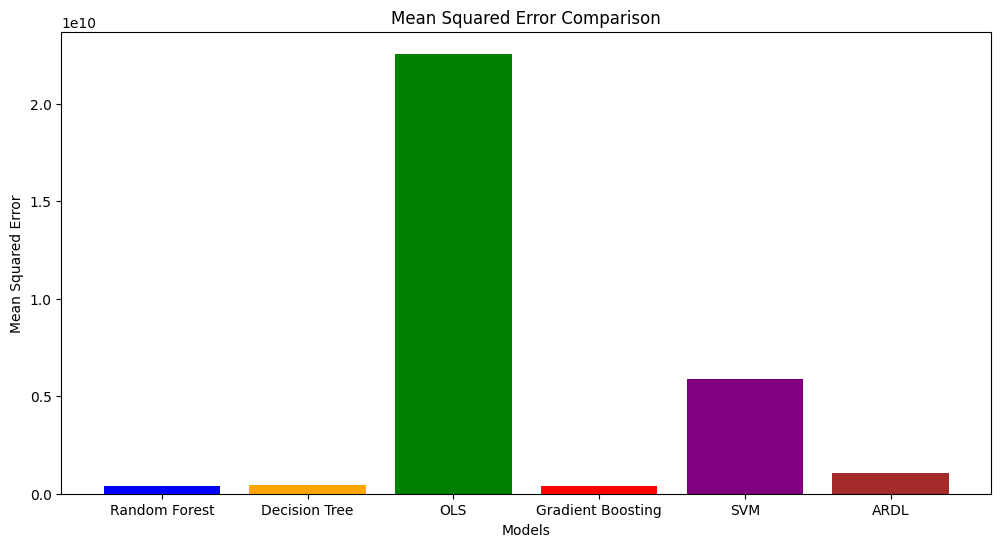

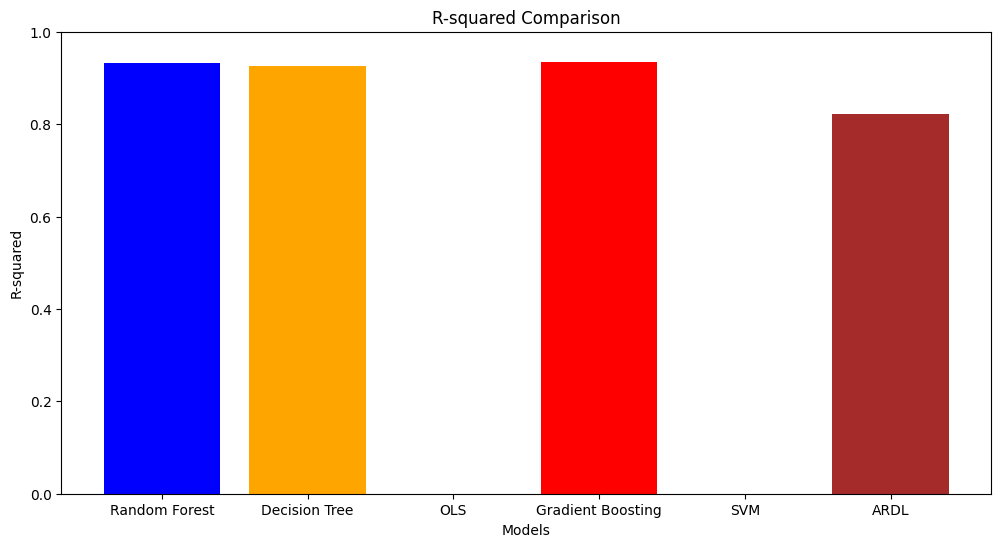

In [45]:
# Evaluation results
models = ['Random Forest', 'Decision Tree', 'OLS', 'Gradient Boosting', 'SVM', 'ARDL']
mae_values = [mae_rf, mae_dt, mae_ols, mae_gb, mae_svm, mae_ardl]
mse_values = [mse_rf, mse_dt, mse_ols, mse_gb, mse_svm, mse_ardl]
r2_values = [r2_rf, r2_dt, r2_ols, r2_gb, r2_svm, r2_ardl]

# Plotting Mean Absolute Error
plt.figure(figsize=(12, 6))
plt.bar(models, mae_values, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.title('Mean Absolute Error Comparison')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error')
plt.show()

# Plotting Mean Squared Error
plt.figure(figsize=(12, 6))
plt.bar(models, mse_values, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.title('Mean Squared Error Comparison')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.show()

# Plotting R-squared
plt.figure(figsize=(12, 6))
plt.bar(models, r2_values, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.title('R-squared Comparison')
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.ylim(0, 1) 
plt.show()


Now our R2 is significantly bigger and we can see clearly that classfication models are performing better with salary prediction.

But this salary prediction was achived by a little cheating (using salary cluster which is very strong indicatior where our salary can go).

Nevertheless we can say that our goal is acomplished, we should be able to correctly predict salary and we can see which models are best in this task.